In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.figure import Figure
import typing as tp

class YouTube:
    def __init__(self, path_to_df: str = "data/RUvideos_short.csv"):
        self.df = pd.read_csv(path_to_df)
        self.df.trending_date = pd.to_datetime(self.df.trending_date,
                                               format='%y.%d.%m', dayfirst=True)

    def task1(self) -> pd.DataFrame:
        return self.df

    def task2(self) -> pd.DataFrame:
        self.df = self.df[['trending_date', 'category_id', 'views',
                                 'likes', 'dislikes', 'comment_count']]
        self.df.trending_date = self.df.trending_date.dt.day
        return self.df

    def task3(self) -> Figure:
        plt.figure(figsize=(15, 8))

        sns.boxplot(data=self.df, x='trending_date', y='views', palette='Set3')
        plt.ylabel('Число просмотров')
        plt.xlabel('Число ноября')
        plt.title('Статистика просмотров по дням')
        plt.ylim((-5, 0.5*1e6))
        return plt.gcf()

    def task4(self) -> Figure:
        plt.figure(figsize=(15, 8))

        sns.boxplot(data=self.df, x='trending_date', y='views', palette='Set3')
        plt.ylabel('Число просмотров')
        plt.xlabel('Число ноября')
        plt.title('Статистика просмотров по дням')
        plt.ylim((-5, 0.5*1e6))
        return plt.gcf()

    def task5(self) -> Figure:
        plt.figure(figsize=(15, 8))

        sns.jointplot(data=self.df, x='views', y='likes', palette='Set3', alpha=0.5)
        plt.ylabel('Число просмотров')
        plt.xlabel('Количество лайков')
        plt.title('Зависимость просмотров от лайков')
        plt.xlim((-5, 1.25*1e6))
        plt.ylim((-5, 0.1*1e6))
        return plt.gcf()

    def task6(self) -> Figure:
        plt.figure(figsize=(15, 8))

        Q11 = self.df['views'].quantile(0.0001)
        Q13 = self.df['views'].quantile(0.5)
        df_IQR = self.df[((self.df['views'] > Q11) & (self.df['views'] < Q13))]

        Q21 = self.df['likes'].quantile(0.0001)
        Q23 = self.df['likes'].quantile(0.5)
        df_IQR = df_IQR[((df_IQR['likes'] > Q21) & (df_IQR['likes'] < Q23))]

        sns.jointplot(data=df_IQR, x='views', y='likes', palette='Set3', alpha=0.5)
        plt.ylabel('Число лайков')
        plt.xlabel('Количество просмотров')
        plt.title('Зависимость просмотров от лайков')
        return plt.gcf()

In [2]:
hosting = YouTube()
hosting.df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,gDuslQ9avLc,2017-11-14,Захар и Полина учатся экономить,Т—Ж БОГАЧ,22,2017-11-13T09:09:31.000Z,"захар и полина|""учимся экономить""|""копить день...",62408,334,190,50,https://i.ytimg.com/vi/gDuslQ9avLc/default.jpg,False,False,False,"Знакомьтесь, это Захар и Полина. Вместе с ними..."
1,AOCJIFEA_jE,2017-11-14,Биржа Мемов #29. Большой выпуск,Druzhko Show,22,2017-11-13T17:32:11.000Z,"биржа мемов|""лев шагинян""|""мемы""|""пикчи""|""друж...",330043,43841,2244,2977,https://i.ytimg.com/vi/AOCJIFEA_jE/default.jpg,False,False,False,"В 29 выпуске Дружко Шоу Сергей сказал, что Бир..."
2,VAWNQDgwwOM,2017-11-14,ХАЙП КЭМП - СВОЙ СРЕДИ ЧУЖИХ,Юлик,24,2017-11-13T16:11:31.000Z,"юмор|""комедия""|""влог""|""блог""|""смешно""|""смешное...",424596,49854,714,2944,https://i.ytimg.com/vi/VAWNQDgwwOM/default.jpg,False,False,False,http://kapitany.ru/!Yulik.cap - Факультет #Кап...
3,gknkFwKQfHg,2017-11-14,Сочная кесадилья с курицей,Hochland,22,2017-11-13T06:51:10.000Z,"хохланд|""сыр""|""рецепты""|""как приготовить""|""вку...",112851,3566,122,80,https://i.ytimg.com/vi/gknkFwKQfHg/default.jpg,False,False,False,*** как готовить ресторанные блюда дома
4,3sYvZcwzZr8,2017-11-14,КЛИПЫ РОДИТЕЛЕЙ НА ШКОЛЬНЫЙ ВЫПУСКНОЙ,Совергон,24,2017-11-13T16:52:36.000Z,"Совергон|""Sovergon""|""клипы""|""родители""|""школа""...",243469,36216,631,1692,https://i.ytimg.com/vi/3sYvZcwzZr8/default.jpg,False,False,False,❏ КОНКУРС КАПИТАНЫ: http://kapitany.ru/!Soverg...


In [3]:
hosting.df = hosting.df[['trending_date', 'category_id', 'views',
                         'likes', 'dislikes', 'comment_count']]
hosting.df.head()

,trending_date,category_id,views,likes,dislikes,comment_count
0,2017-11-14,22,62408,334,190,50
1,2017-11-14,22,330043,43841,2244,2977
2,2017-11-14,24,424596,49854,714,2944
3,2017-11-14,22,112851,3566,122,80
4,2017-11-14,24,243469,36216,631,1692


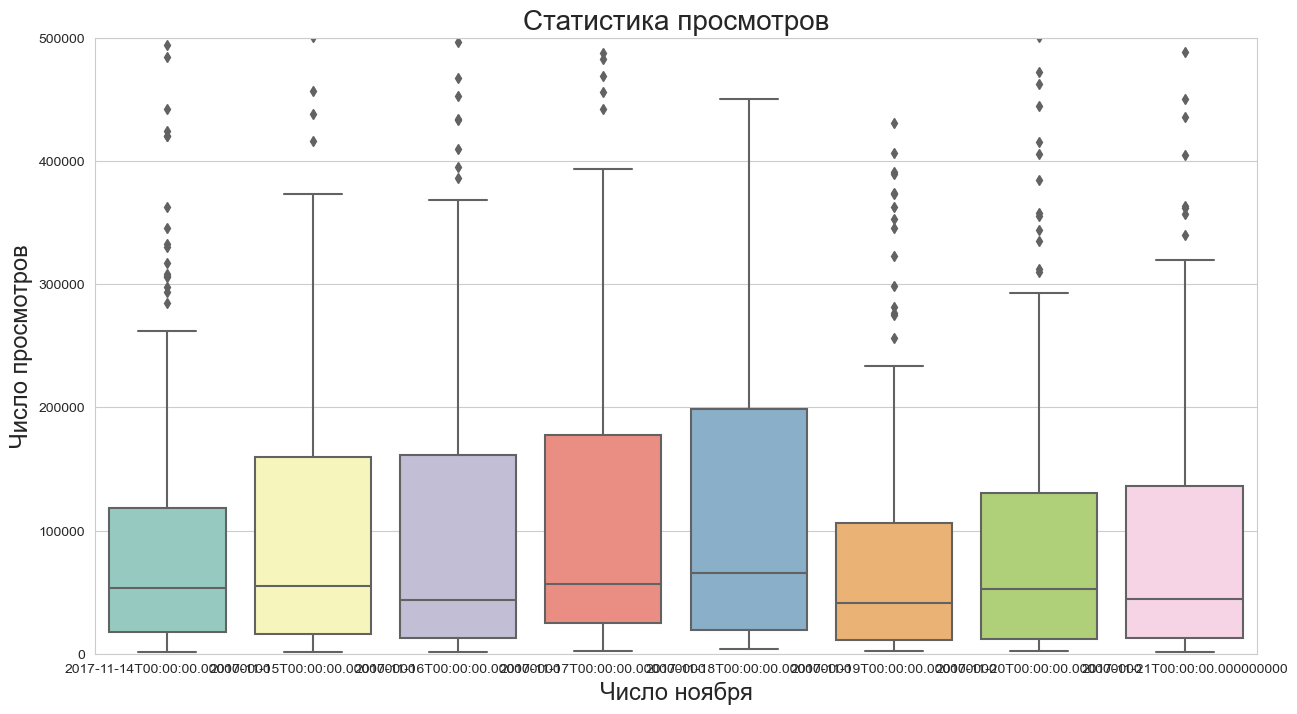

In [4]:
plt.figure(figsize=(15, 8))

sns.boxplot(data=hosting.df, x='trending_date', y='views', palette='Set3')
plt.ylabel('Число просмотров', fontdict={'fontsize': 17})
plt.xlabel('Число ноября', fontdict={'fontsize': 17})
plt.title('Статистика просмотров', fontdict={'fontsize': 20})
plt.ylim((-5, 0.5*1e6))

plt.show()

<Figure size 2500x2500 with 0 Axes>

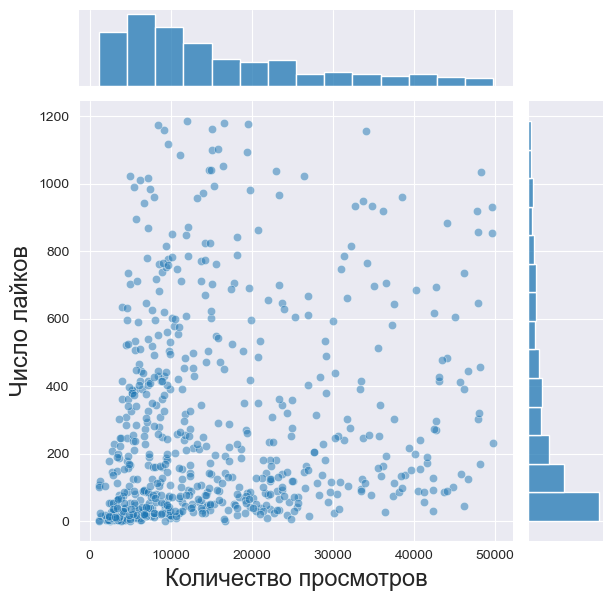

In [33]:
plt.figure(figsize=(25, 25))

Q11 = hosting.df['views'].quantile(0.0001)
Q13 = hosting.df['views'].quantile(0.5)
df_IQR = hosting.df[((hosting.df['views'] > Q11) & (hosting.df['views'] < Q13))]

Q21 = hosting.df['likes'].quantile(0.0001)
Q23 = hosting.df['likes'].quantile(0.5)
df_IQR = df_IQR[((df_IQR['likes'] > Q21) & (df_IQR['likes'] < Q23))]


with sns.axes_style("darkgrid"):
    sns.jointplot(data=df_IQR, x='views', y='likes', palette='Set3', alpha=0.5)
    plt.ylabel('Число лайков', fontdict={'fontsize': 17})
    plt.xlabel('Количество просмотров', fontdict={'fontsize': 17})

plt.show()